# AR(1)

The AR(1) randowm process is defined by,</br>

$
\begin{align}
X_t=\varphi x_{t-1} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,</br>

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

It follows that,</br>

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

It can be shown that in the limit $t \rightarrow \infty$ with $\lvert \varphi \rvert < 1,$</br>

$
\begin{align}
&\lim_{t \to \infty} \text{E}[X_t] = 0 \\
&\lim_{t \to \infty} \text{Var}[X_t] = \frac{\sigma^2}{1-\varphi^2} \\
&\lim_{t \to \infty} \text{Cov}[X_t X_{t+n}] = \varphi^n \sigma^2
\end{align}
$

where $n>0$.The autocorrelation coefficient is defined by,</br>

$
\begin{align}
\gamma_{\tau} = \frac{\text{Cov}[X_t X_{t+\tau}]}{\sigma^2} = \varphi^{\tau}
\end{align}
$

AR(1) is realted to $\text{MA}(\infty)$. To see this consider,</br>

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the shift operator,</br>

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,</br>

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It folllows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$.</br>


## Imports

In [275]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import ar
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Plots

In [276]:
def auto_correlation_plot(ac, φ, nplot, title, ylim):
    ac_eq = [φ**n for n in range(nplot)]
    figure, axis = pyplot.subplots(figsize=(12, 8))
    axis.set_ylabel(r"$γ_{\tau}$")
    axis.set_xlabel(r"Time Lag $(\tau)$")
    if ylim is None:
        axis.set_ylim([-0.1, 1.0])
    else:
        axis.set_ylim(ylim)
    axis.set_title(title)
    axis.plot(range(nplot), numpy.real(ac[:nplot]), lw="2", label="Simualtion Ensemble", zorder=5)
    axis.plot(range(nplot), ac_eq, marker='o', markersize=10.0, linestyle="None", markeredgewidth=1.0, alpha=0.75, label=r"$φ^{\tau}$", zorder=6)
    axis.legend(bbox_to_anchor=(0.8, 0.8), fontsize=16)

## Helpers

In [277]:
nseries = 3
nsample = 1000
σ = 1.0

def plot_labels(φ):
    return [f"φ={val}" for val in φ]
           
def ar1_series(φ):
    series = []
    for i in range(0, nseries):
        series.append(ar.arq_series(1, [φ[i]], σ, nsample))
    return series

def ar1_ensemble(φ, nsample, nsim):
    series = numpy.array([ar.arq_series(1, [φ], σ, nsample)])
    for i in range(1, nsim):
        series = numpy.append(series, numpy.array([ar.arq_series(1, [φ], σ, nsample)]), axis=0)
    return series

def sigma(φ, σ):
    return numpy.sqrt(σ**2/(1.0-φ**2))

## Time Series $\varphi$ Scan 

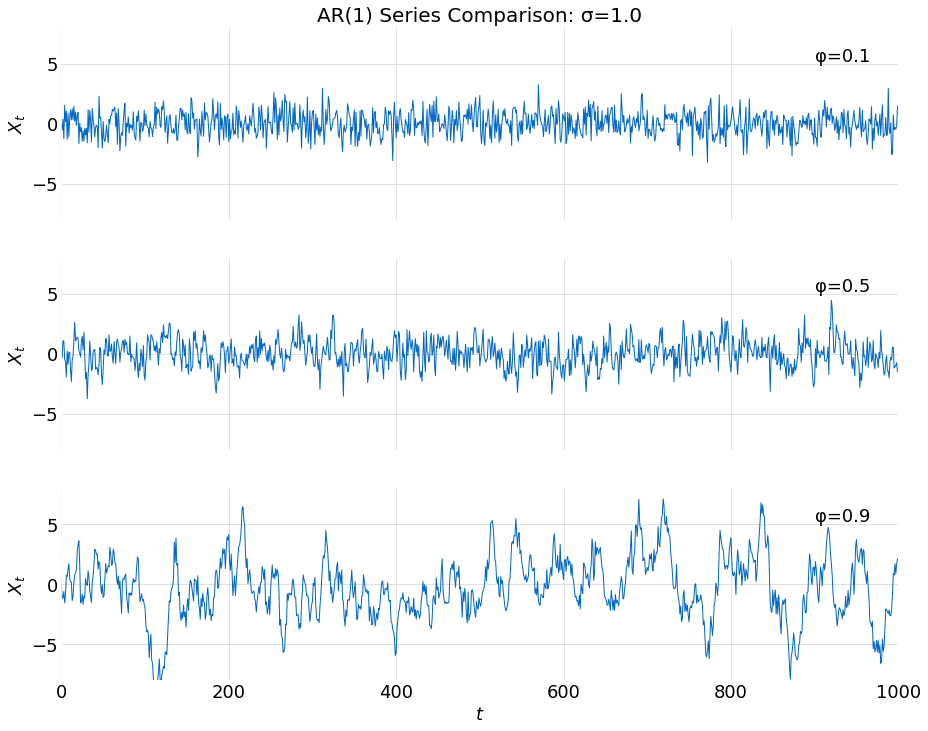

In [278]:
title = f"AR(1) Series Comparison: σ={σ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels(φ) 
series = ar1_series(φ)
plots.time_series_stack(series, labels, [-8.0, 8.0], title)

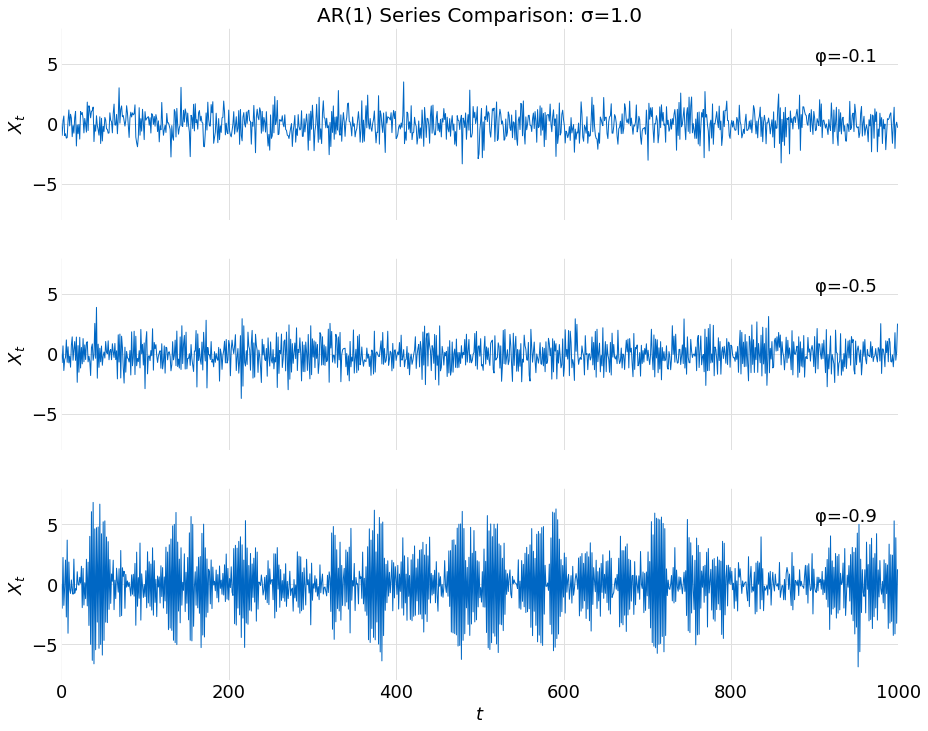

In [279]:
title = f"AR(1) Series Comparison: σ={σ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels(φ) 
series = ar1_series(φ)
plots.time_series_stack(series, labels, [-8.0, 8.0], title)

## Mean

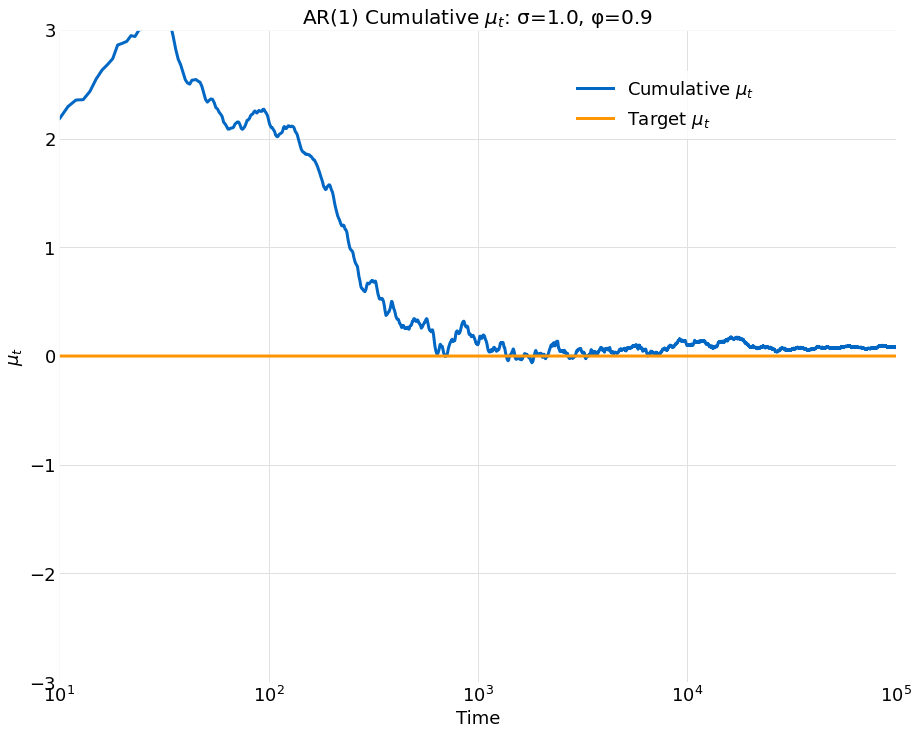

In [280]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, φ={φ}"
label = r"$\mu_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, [-3.0, 3.0], title, label)

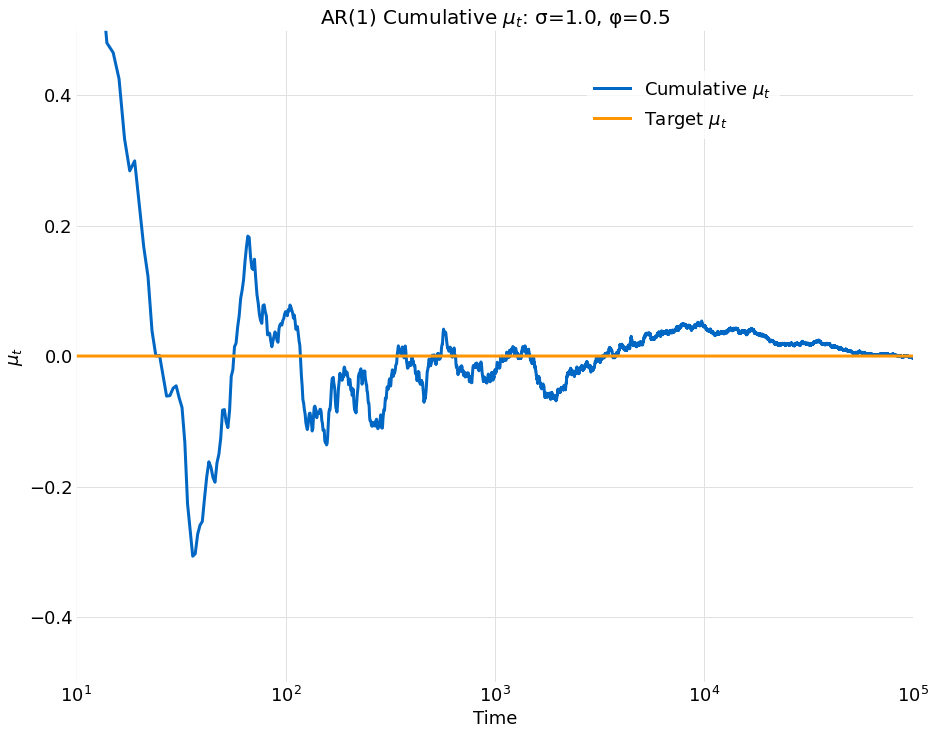

In [281]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, φ={φ}"
label = r"$\mu_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, [-0.5, 0.5], title, label)

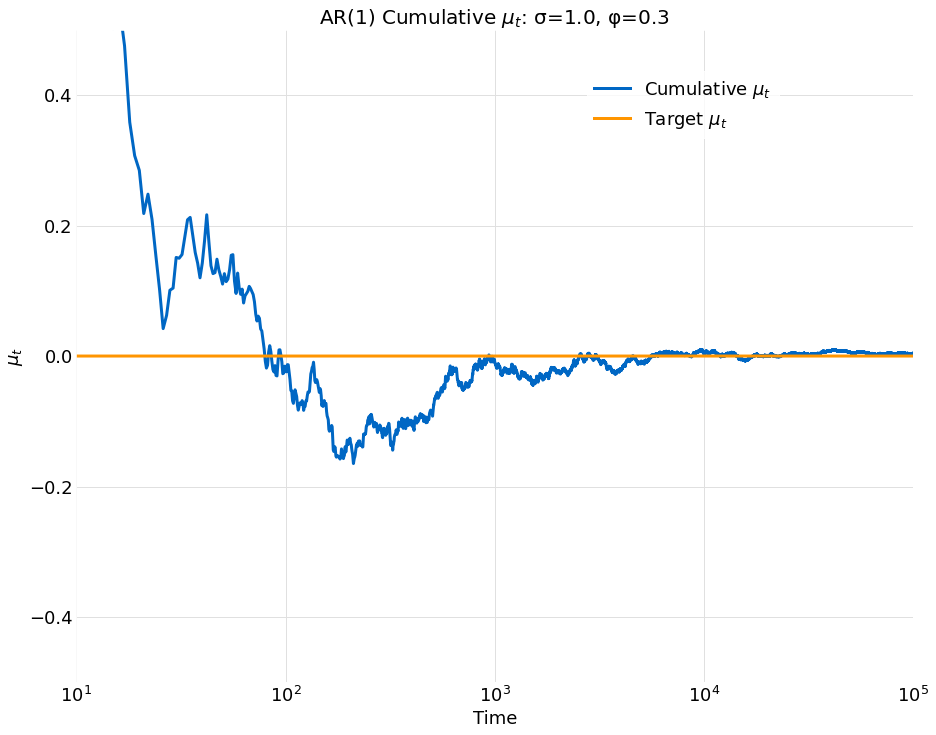

In [282]:
φ = 0.3
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, φ={φ}"
label = r"$\mu_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, [-0.5, 0.5], title, label)

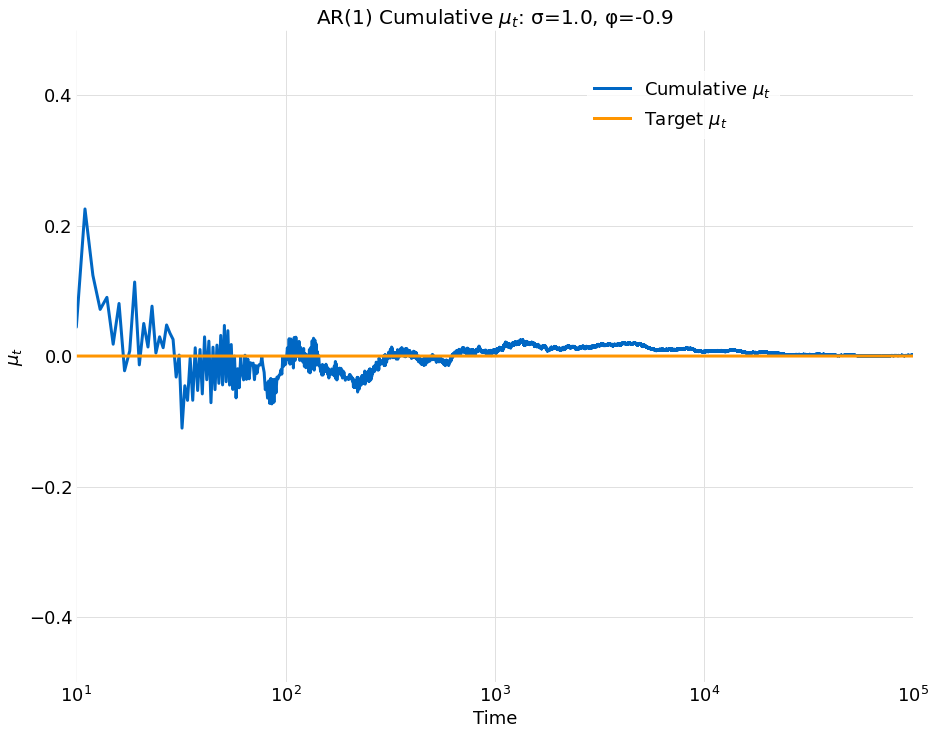

In [283]:
φ = -0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, φ={φ}"
label = r"$\mu_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, [-0.5, 0.5], title, label)

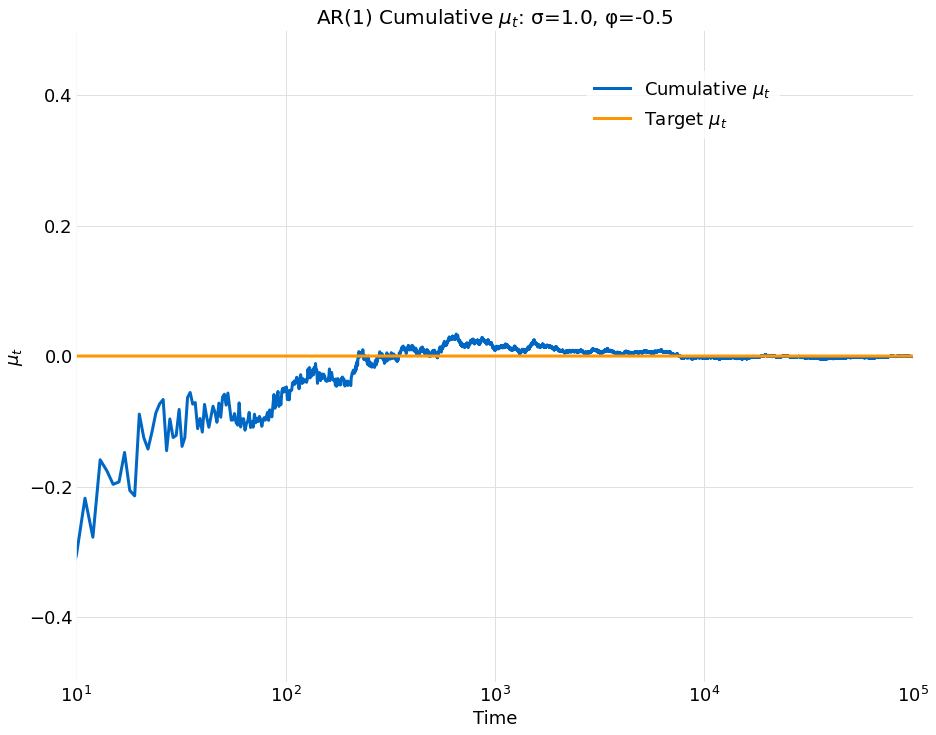

In [284]:
φ = -0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, φ={φ}"
label = r"$\mu_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, [-0.5, 0.5], title, label)

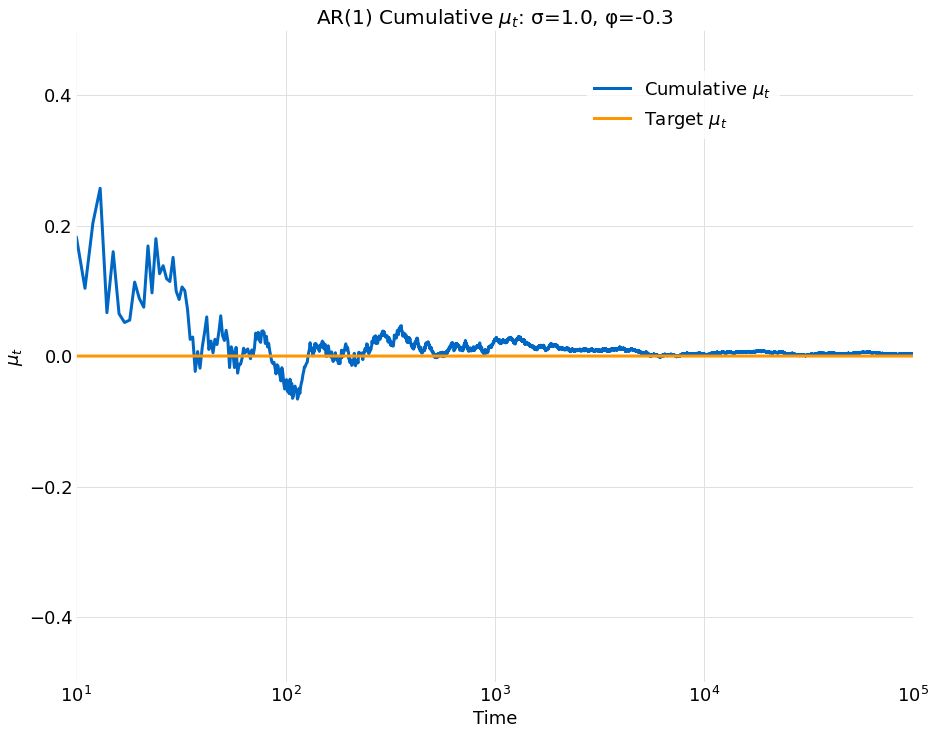

In [285]:
φ = -0.3
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t$: " + f"σ={σ}, φ={φ}"
label = r"$\mu_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cummean(samples)
target = 0.0
plots.cumulative(accum, target, [-0.5, 0.5], title, label)

## Standard Deviation

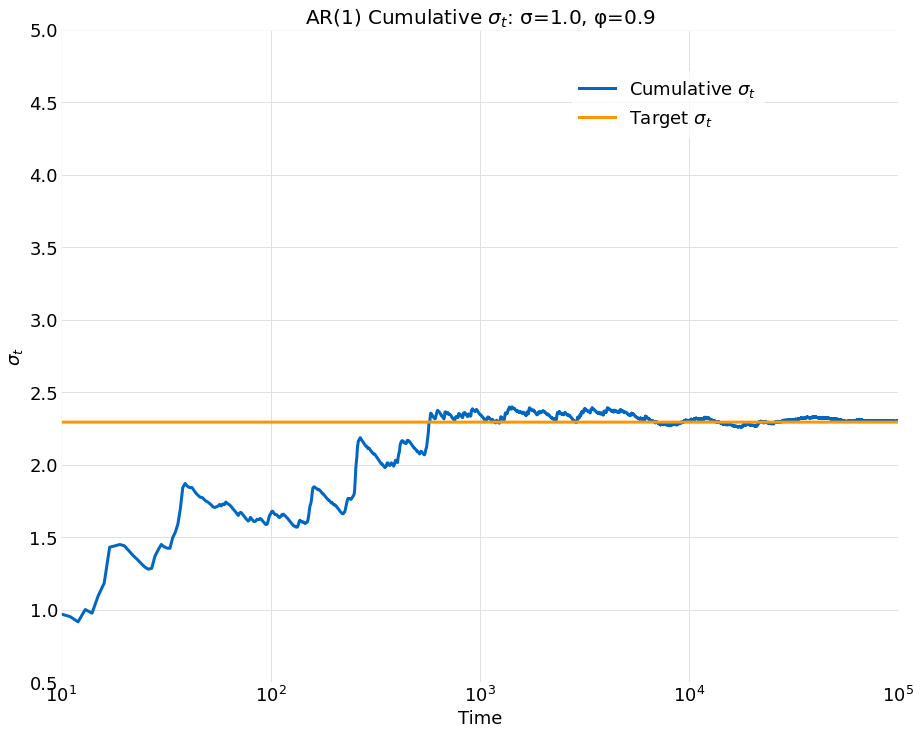

In [286]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, φ={φ}"
label = r"$\sigma_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cumsigma(samples)
target = sigma(φ, σ)
plots.cumulative(accum, target, [0.5, 5.0], title, label)

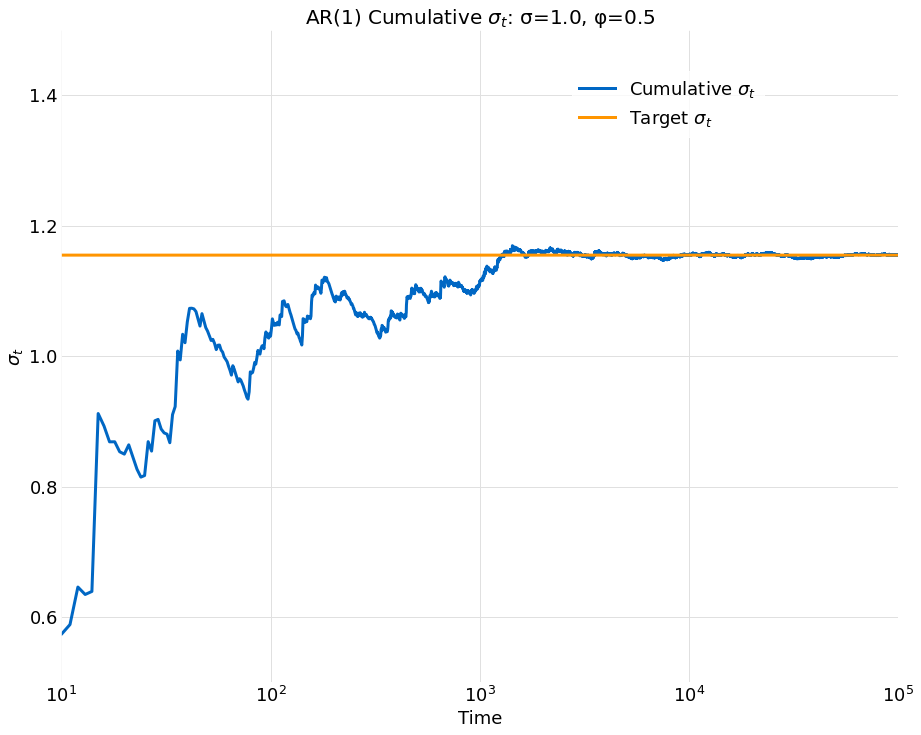

In [287]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, φ={φ}"
label = r"$\sigma_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cumsigma(samples)
target = sigma(φ, σ)
plots.cumulative(accum, target, [0.5, 1.5], title, label)

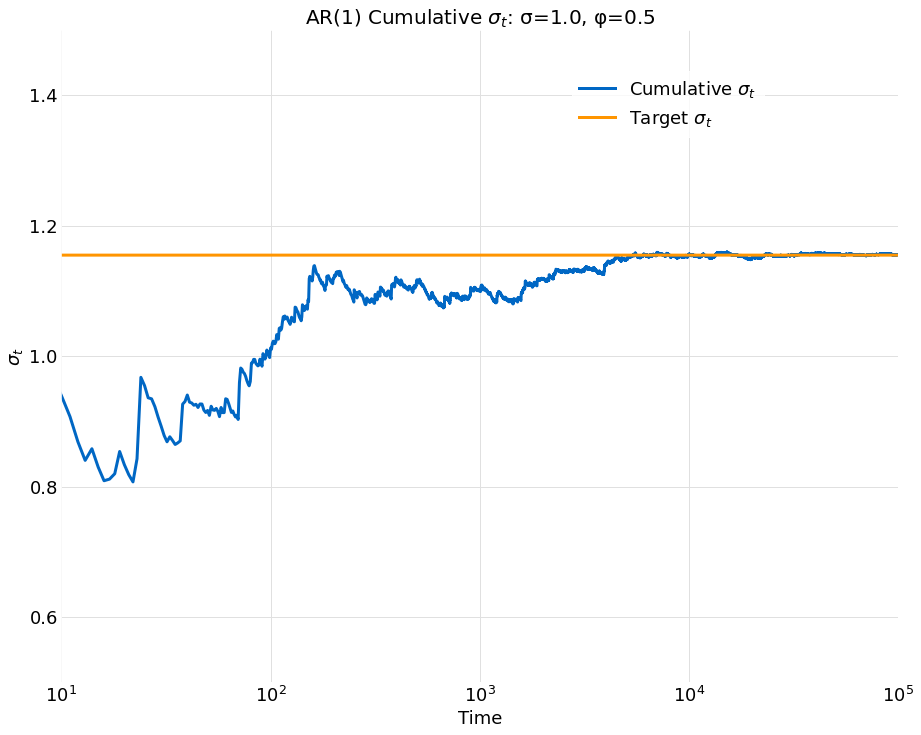

In [288]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, φ={φ}"
label = r"$\sigma_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cumsigma(samples)
target = sigma(φ, σ)
plots.cumulative(accum, target, [0.5, 1.5], title, label)

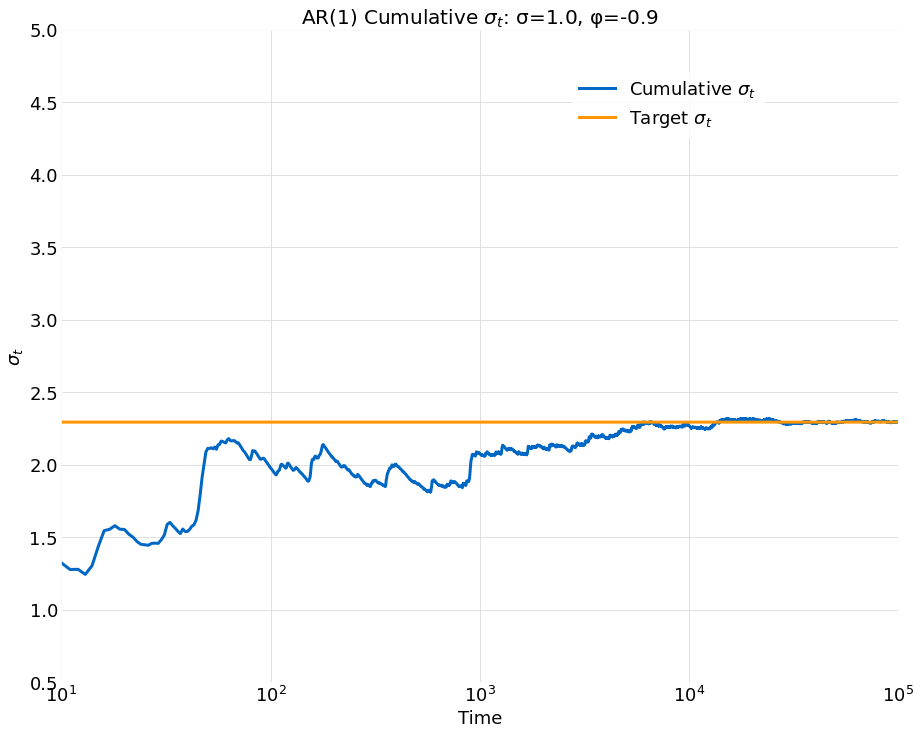

In [289]:
φ = -0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, φ={φ}"
label = r"$\sigma_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cumsigma(samples)
target = sigma(φ, σ)
plots.cumulative(accum, target, [0.5, 5.0], title, label)

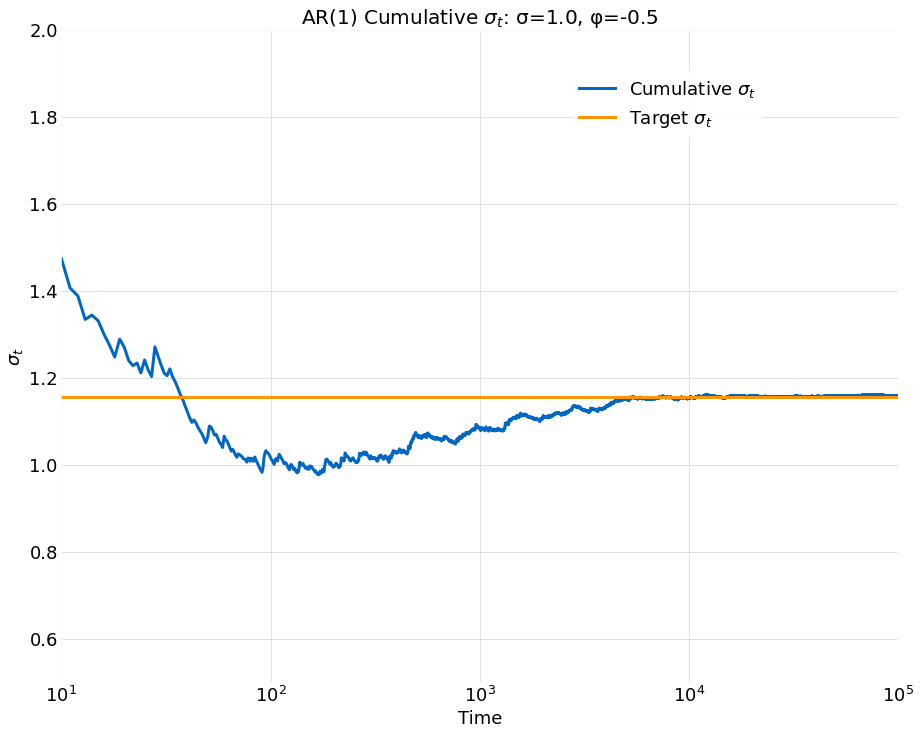

In [290]:
φ = -0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, φ={φ}"
label = r"$\sigma_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cumsigma(samples)
target = sigma(φ, σ)
plots.cumulative(accum, target, [0.5, 2.0], title, label)

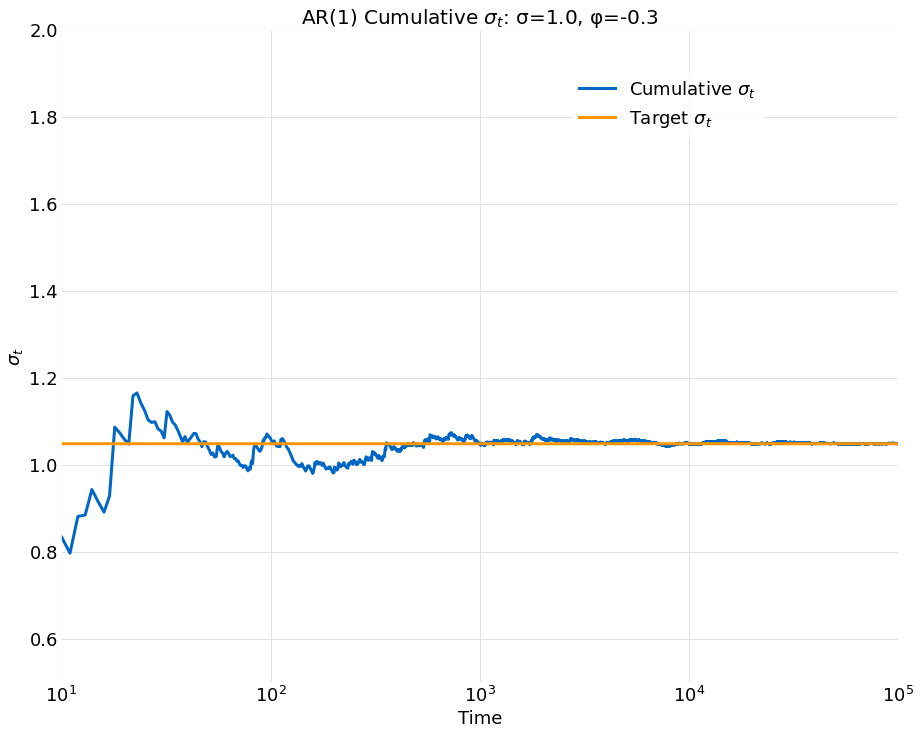

In [291]:
φ = -0.3
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t$: " + f"σ={σ}, φ={φ}"
label = r"$\sigma_t$"
samples = ar.arq_series(1, [φ], σ, nsample)
accum = stats.cumsigma(samples)
target = sigma(φ, σ)
plots.cumulative(accum, target, [0.5, 2.0], title, label)

## Autocorrelation

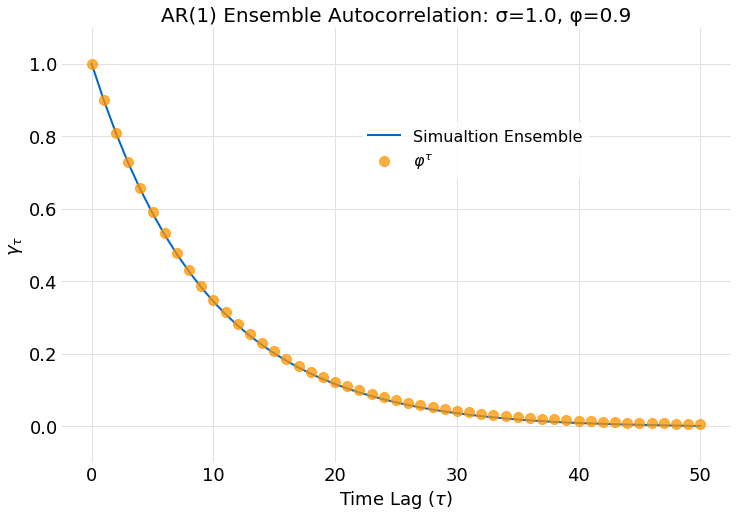

In [292]:
φ = 0.9
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_autocorrelation(samples)
auto_correlation_plot(ac, φ, 51, title, [-0.1, 1.1])

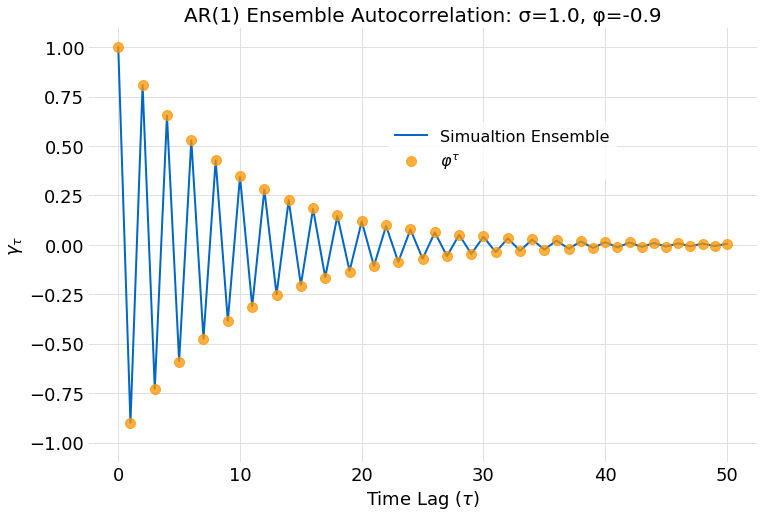

In [293]:
φ = -0.9
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_autocorrelation(samples)
auto_correlation_plot(ac, φ, 51, title, [-1.1, 1.1])

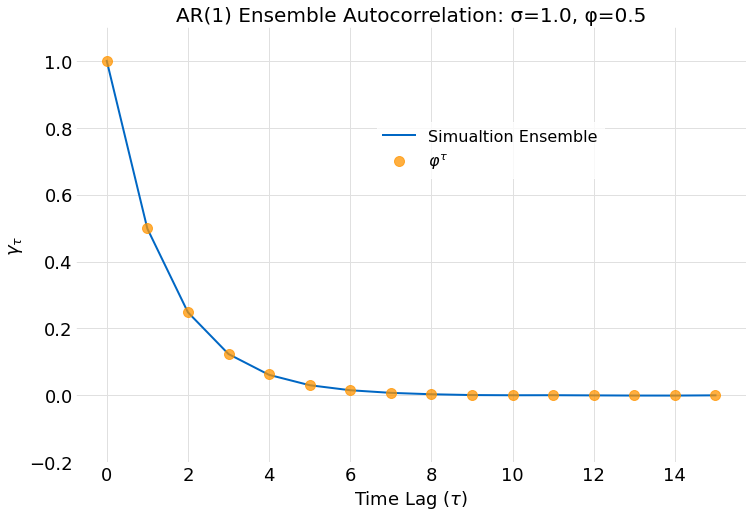

In [294]:
φ = 0.5
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_autocorrelation(samples)
auto_correlation_plot(ac, φ, 16, title, [-0.2, 1.1])

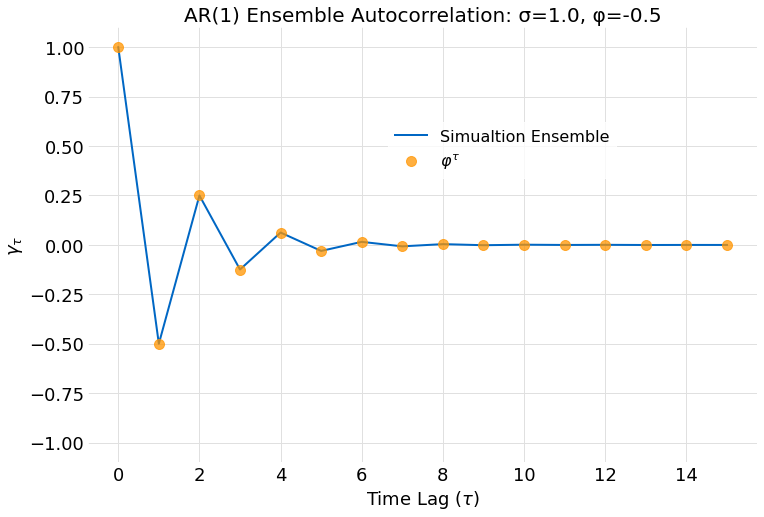

In [295]:
φ = -0.5
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_autocorrelation(samples)
auto_correlation_plot(ac, φ, 16, title, [-1.1, 1.1])

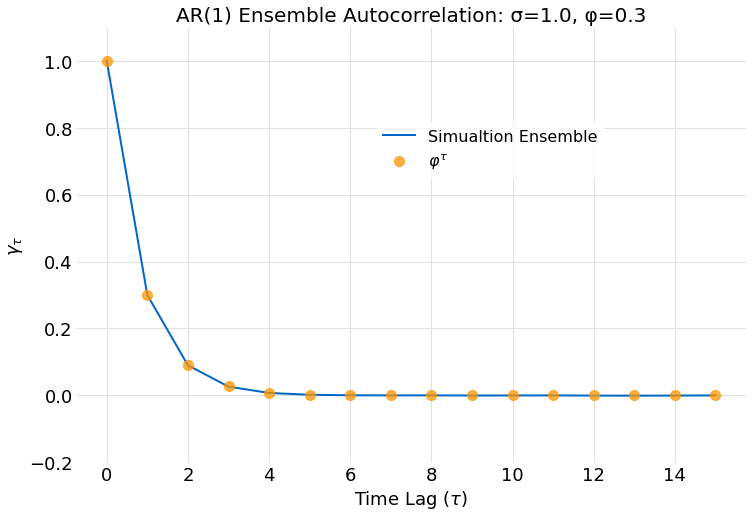

In [296]:
φ = 0.3
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_autocorrelation(samples)
auto_correlation_plot(ac, φ, 16, title, [-0.2, 1.1])

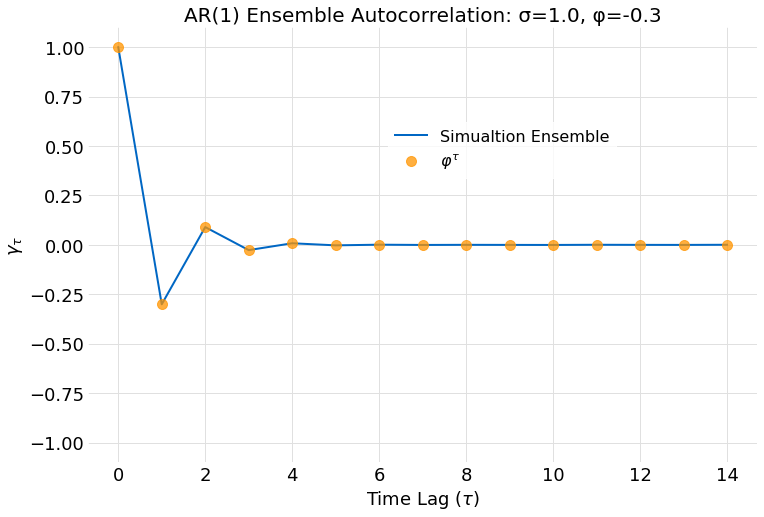

In [297]:
φ = -0.3
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = ar1_ensemble(φ, nsample, nsim)
ac = stats.ensemble_autocorrelation(samples)
auto_correlation_plot(ac, φ, 15, title, [-1.1, 1.1])